<h2 align="center"> Logistic Regression using Gradient Descent </h2>

This project was done as a part of the Coursera Guided project [link]( https://www.coursera.org/projects/logistic-regression-numpy-python)

### 1. Load libraries and read the data

In [1]:
###################################################
# Importing libraries
###################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dmv_data = pd.read_csv('data/DMV_Written_Tests.csv')
print('Shape of the data :', dmv_data.shape)
dmv_data.head()

Shape of the data : (100, 3)


,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
for c in dmv_data.columns:
    print('**************************************************')
    print('Column Name - ', c)
    print('Column type - ', dmv_data[c].dtype)
    print('NA Values -', dmv_data[c].isna().sum())
    print('Number of Unique values - ', len(dmv_data[c].unique()))

**************************************************
Column Name -  DMV_Test_1
Column type -  float64
NA Values - 0
Number of Unique values -  100
**************************************************
Column Name -  DMV_Test_2
Column type -  float64
NA Values - 0
Number of Unique values -  100
**************************************************
Column Name -  Results
Column type -  int64
NA Values - 0
Number of Unique values -  2


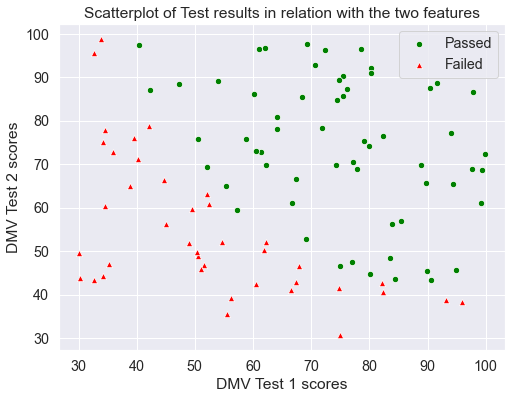

In [62]:
###################################################
# Visualize the data
###################################################

# scatterplot to see the two results in relation to the two features

# separate out the feat and result columns
feat = dmv_data[['DMV_Test_1', 'DMV_Test_2']].values
res = dmv_data['Results'].values

# plot the data
sns.set(style='darkgrid', font_scale=1.3)
fig = plt.subplots(figsize=(8,6))

ax = sns.scatterplot(x= dmv_data[dmv_data['Results'] == 1].loc[:,'DMV_Test_1'], 
                    y = dmv_data[dmv_data['Results'] == 1].loc[:,'DMV_Test_2'],
                    marker = "o",
                    color = "green",
                    s = 40)

sns.scatterplot(x= dmv_data[dmv_data['Results'] == 0].loc[:,'DMV_Test_1'], 
                y = dmv_data[dmv_data['Results'] == 0].loc[:,'DMV_Test_2'],
                marker = "^",
                color = "red",
                s = 40)

ax.set(xlabel = "DMV Test 1 scores", ylabel = "DMV Test 2 scores")
ax.set_title("Scatterplot of Test results in relation with the two features")
ax.legend(['Passed', 'Failed'])
plt.show()

### 2. Building the logistic regression model 

Sigmoid function 

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$


Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [63]:
###################################################
# Define key functions
###################################################

# function that returns the sigmoid function for a given variable
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

# function that returns the cost & the gradient
def compute_cost(theta, x, y):
    m = len(y)
    
    y_pred = sigmoid(np.dot(x, theta))
    
    error = (y*np.log(y_pred)) + (1-y)*np.log(1-y_pred)
    cost = (-1.0/m) * sum(error)
    
    gradient = (1.0/m)*np.dot(x.transpose(), (y_pred - y))
    
    return cost[0], gradient

# function that does the gradient descent
def grad_desc(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta = theta - (alpha*gradient)
        costs.append(cost)
    
    return theta, costs

In [64]:
# standardize the feature variables
feat = (feat - np.mean(feat, axis=0))/np.std(feat,axis=0)

# create the x and y data - for x we will be adding ones as additional column
x = np.append(np.ones([feat.shape[0], 1]), feat, axis=1)
y = res.reshape(feat.shape[0], 1)

# initialize theta
theta_init = np.zeros([feat.shape[1] + 1, 1])

# get the cost and gradient at initialization
cost, gradient = compute_cost(theta_init, x, y)
print("Cost at initialization :", cost)
print("Gradient at initialization :", gradient)

# get the cost and theta after minimizing the cost for 200 iterations
theta, costs = grad_desc(x, y, theta_init, 1, 200)
print("Theta after running gradient descent :", theta)
print("Cost after running the gradient descent :", costs[-1])

Cost at initialization : 0.693147180559946
Gradient at initialization : [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]
Theta after running gradient descent : [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Cost after running the gradient descent : 0.2048938203512014


Text(0.5, 1.0, 'Value of cost function over each iteration during gradient descent')

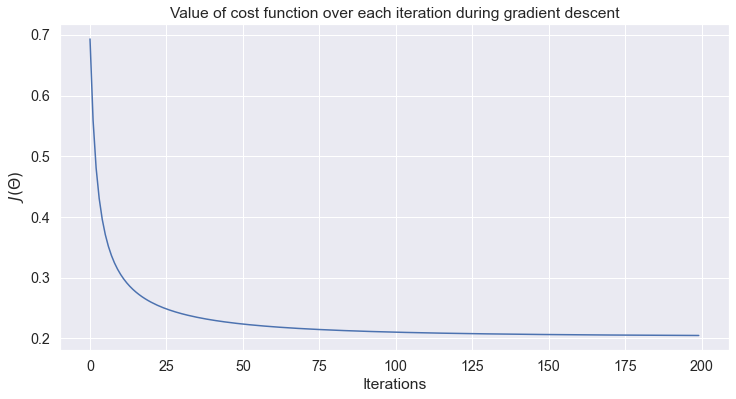

In [65]:
###################################################
# Plotting the cost function over all iterations
###################################################

sns.set(style='darkgrid', font_scale=1.3)
fig = plt.subplots(figsize=(12,6))

plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Value of cost function over each iteration during gradient descent")

#### Plotting the decision boundary

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

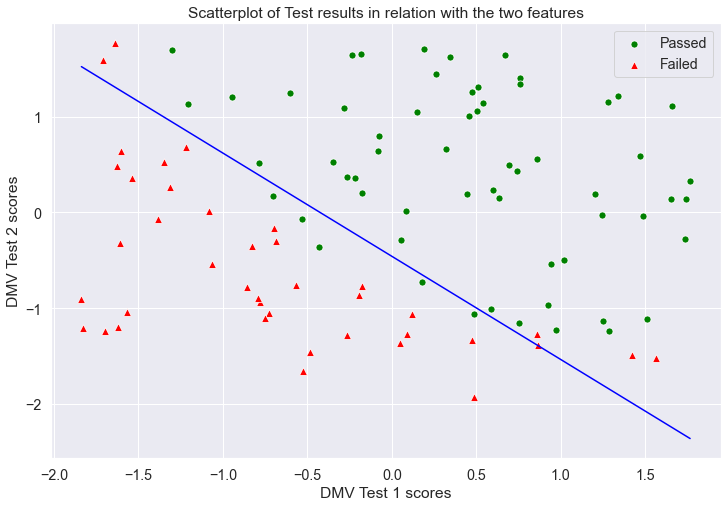

In [73]:
# plot the data - sctter
sns.set(style='darkgrid', font_scale=1.3)
fig = plt.subplots(figsize=(12,8))

ax = sns.scatterplot(x = x[y[:,0]==1][:,1], 
                    y = x[y[:,0]==1][:,2],
                    marker = "o",
                    color = "green",
                    s = 50)

sns.scatterplot(x = x[y[:,0]==0][:,1], 
                y = x[y[:,0]==0][:,2],
                marker = "^",
                color = "red",
                s = 60)

ax.set(xlabel = "DMV Test 1 scores", ylabel = "DMV Test 2 scores")
ax.set_title("Scatterplot of Test results in relation with the two features")
ax.legend(['Passed', 'Failed'])

# plot the boundary

xbound = np.array([np.min(x[:,1]), np.max(x[:,1])]) 
ybound = -(theta[0] + (theta[1]*xbound))/theta[2]

sns.lineplot(x=xbound, y=ybound, color="blue")
plt.show()

#### Predicting using the $\Theta$ values

$h_\theta(x) = x\theta$

In [82]:
# we will check the accuracy of the model for the training data itself

# function that returns the predicted values for a given feature data
def pred_res(theta, x):
    res = x.dot(theta)
    return res > 0

p = pred_res(theta, x)
print("Accuracy :", 100*len(p[p==y])/len(y), "%")

Accuracy : 89.0 %
